In [23]:
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

df= pd.read_csv('new_nettoyage.csv')

df['date']=df['date'].apply(lambda x : x[0:4])
df['date']=df['date'].astype(int)
df=df.drop(['Unnamed: 0','titre','acteurs','box_office_france','prix','nominations','note_presse'],axis=1)

# création de dictionnaire

In [24]:
sub_df = df[['directeur', 'acteur1', 'acteur2', 'acteur3', 'director_moy_entr', 'acteur1_moy_entr', 'acteur2_moy_entr', 'acteur3_moy_entr']]

# 2. Créer le dictionnaire en utilisant itérations
director_dict = {}
actor_dict = {}

for index, row in sub_df.iterrows():
    director_dict[row['directeur']] = row['director_moy_entr']
    actor_dict[row['acteur1']] = row['acteur1_moy_entr']
    actor_dict[row['acteur2']] = row['acteur2_moy_entr']
    actor_dict[row['acteur3']] = row['acteur3_moy_entr']

In [25]:
import numpy as np



# Obtenez les valeurs du dictionnaire
values = list(director_dict.values())

# Calculez les quantiles de 10% à 100% par pas de 10%
quantiles = np.percentile(values, range(10, 101, 10))

for i, quantile in enumerate(quantiles, start=1):
    print(f"Q{i}: {quantile}")

Q1: 36701.1
Q2: 79848.0
Q3: 135612.9
Q4: 218027.60000000006
Q5: 304074.9
Q6: 443705.13333333324
Q7: 626288.5666666664
Q8: 937489.5000000003
Q9: 1626364.2600000005
Q10: 14319036.0


In [26]:
import numpy as np



# Obtenez les valeurs du dictionnaire
values = list(actor_dict.values())

# Calculez les quantiles de 10% à 100% par pas de 10%
quantiles = np.percentile(values, range(10, 101, 10))

for i, quantile in enumerate(quantiles, start=1):
    print(f"Q{i}: {quantile}")

Q1: 32435.0
Q2: 74711.0
Q3: 134361.8
Q4: 208972.8000000001
Q5: 301978.0
Q6: 442795.0
Q7: 628836.8
Q8: 909983.2000000003
Q9: 1510534.0000000007
Q10: 19273540.0


In [27]:
sorted(director_dict.values())[:30]

[0.0,
 58.0,
 98.0,
 108.0,
 130.0,
 156.0,
 192.0,
 218.0,
 224.0,
 266.0,
 268.0,
 285.0,
 420.0,
 481.0,
 571.0,
 593.0,
 600.0,
 703.0,
 784.0,
 812.0,
 835.0,
 1014.0,
 1037.0,
 1137.0,
 1373.0,
 1409.0,
 1565.0,
 1621.0,
 1712.0,
 1852.0]

# mappage dico

In [28]:
df['directeur'] = df['directeur'].map(director_dict)
df['acteur1'] = df['acteur1'].map(actor_dict)
df['acteur2'] = df['acteur2'].map(actor_dict)
df['acteur3'] = df['acteur3'].map(actor_dict)

In [29]:
df.rename(columns={'budget_def':'budget'},inplace=True)
df['budget'] = df['budget'].str.replace('[\$ ]', '', regex=True)

In [30]:
pays=['Moins de 18 ans']
mask=~df['public'].isin(pays)
df=df[mask]

pays=['Buddy-movie']
mask=~df['genre'].isin(pays)
df=df[mask]

pays=['Liban', 'Islande','Afrique du Sud']
mask=~df['country'].isin(pays)
df=df[mask]

valeures=['Metro Goldwyn Mayer', 'Les Films 13','Night Ed Films','Paname Distribution', 'Alba Longa', 'Distrib Films', 'JML Productions', 'MC4 Distribution','Mica Films', 'Bellissima Films', 'Aramis Films','KMBO', 'Tadrart Films', 'Potemkine Films','Gémini Films', 'Steward','Surreal Films', 'Chrysalide', 'The Jokers / Les Bookmakers', 'Alfama Films','Stone Angels', 'Artedis']
mask=~df['distributeur'].isin(valeures)
df1=df[mask]


genre_counts = df1['genre'].value_counts()

# Créer un masque pour les genres qui apparaissent au moins 3 fois
mask = df1['genre'].isin(genre_counts[genre_counts >= 3].index)
    # path('', include('prediction_app.urls')),
    # path('', include('evaluation_app.urls')),
    # path('', include('monitoring_app.urls')),
# Créer un masque pour les genres qui apparaissent au moins 3 fois
mask = df1['distributeur'].isin(genre_counts[genre_counts >= 3].index)

# Appliquer le masque pour filtrer les lignes
df1 = df1.loc[mask]

genre_counts = df1['country'].value_counts()

# Créer un masque pour les genres qui apparaissent au moins 3 fois
mask = df1['country'].isin(genre_counts[genre_counts >= 3].index)

# Appliquer le masque pour filtrer les lignes
df1= df1.loc[mask]

# definir X et Y : train test split

In [32]:
# X=df1[['distributeur', 'country', 'genre', 'public', 'durée',
#        'directeur',  'acteur1', 'acteur2', 'acteur3',
#        'director_moy_entr', 'numero_semaine', 'budget']]
# Y= df1 ['nbre_entrees']

# X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, shuffle=True, random_state=42)


df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nbre_entrees       0 non-null      int64  
 1   distributeur       0 non-null      object 
 2   country            0 non-null      object 
 3   genre              0 non-null      object 
 4   date               0 non-null      int64  
 5   public             0 non-null      object 
 6   durée              0 non-null      int64  
 7   directeur          0 non-null      float64
 8   note_spectateurs   0 non-null      object 
 9   acteur1            0 non-null      float64
 10  acteur2            0 non-null      float64
 11  acteur3            0 non-null      float64
 12  director_moy_entr  0 non-null      float64
 13  acteur2_moy_entr   0 non-null      float64
 14  acteur3_moy_entr   0 non-null      float64
 15  acteur1_moy_entr   0 non-null      float64
 16  numero_semaine     0 non-null      int64  


# faire selon année 2022

In [45]:
from sklearn.model_selection import train_test_split

# Supposons que vous avez déjà chargé votre dataframe 'df' avec les données du film, y compris une colonne 'année' pour l'année de sortie du film.

# Diviser les données en ensemble d'entraînement et ensemble de test
train_df = df[df['date'] < 2019]
test_df = df[df['date'] >= 2019]
train_df.drop(['date'],axis=1)
test_df.drop(['date'],axis=1)
# Diviser les ensembles en caractéristiques (X) et cible (y)
X_train = train_df.drop('nbre_entrees', axis=1)  # Remplacez 'cible' par le nom de la colonne de votre cible
y_train = train_df['nbre_entrees']  # Remplacez 'cible' par le nom de la colonne de votre cible

X_test = test_df.drop('nbre_entrees', axis=1)  # Remplacez 'cible' par le nom de la colonne de votre cible
y_test = test_df['nbre_entrees'] 

In [46]:
len(X_test)

272

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor


ordinal_features=[ 'country', 'genre', 'public','distributeur',
       
        'numero_semaine']

numerical_features = ['durée', 'directeur', 'acteur1', 'acteur2', 'acteur3']


other_cat= OrdinalEncoder()
# categorical_transformer = OneHotEncoder(sparse_output=True)

numerical_transformer = MinMaxScaler()


categorical_transformer = OneHotEncoder(sparse_output=True, handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('other_cat', categorical_transformer, ordinal_features),
        ('num', numerical_transformer, numerical_features)
    ],
    remainder='drop'
)

log_reg = CatBoostRegressor()

pipe = Pipeline([
     ('preprocessor', preprocessor),
     ('log_reg', log_reg)
])

pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('other_cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['country', 'genre', 'public',
                                                   'distributeur',
                                                   'numero_semaine']),
                                                 ('num', MinMaxScaler(),
                                                  ['durée', 'directeur',
                                                   'acteur1', 'acteur2',
                                                   'acteur3'])])),
                ('log_reg',
                 <catboost.core.CatBoostRegressor object at 0x7f58399edd20>)])

In [48]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

Learning rate set to 0.046046
0:	learn: 389487.1166651	total: 1.9ms	remaining: 1.9s
1:	learn: 380110.8637924	total: 3.7ms	remaining: 1.85s
2:	learn: 371688.7721775	total: 5.27ms	remaining: 1.75s
3:	learn: 363894.2233752	total: 6.7ms	remaining: 1.67s
4:	learn: 356152.5354056	total: 8.17ms	remaining: 1.63s
5:	learn: 349177.4924739	total: 10.6ms	remaining: 1.75s
6:	learn: 341523.3112857	total: 11.9ms	remaining: 1.68s
7:	learn: 334455.3368685	total: 13.6ms	remaining: 1.68s
8:	learn: 328388.0013690	total: 15ms	remaining: 1.66s
9:	learn: 322100.4589182	total: 16.4ms	remaining: 1.63s
10:	learn: 316633.1354874	total: 17.8ms	remaining: 1.6s
11:	learn: 310979.8235869	total: 19.2ms	remaining: 1.58s
12:	learn: 305503.8679710	total: 20.7ms	remaining: 1.57s
13:	learn: 300779.5705419	total: 22.4ms	remaining: 1.57s
14:	learn: 295915.6674763	total: 24ms	remaining: 1.57s
15:	learn: 291111.4391136	total: 25.9ms	remaining: 1.59s
16:	learn: 286488.9214078	total: 27.6ms	remaining: 1.59s
17:	learn: 282779.53

0.8255725512831668

In [42]:
from sklearn.metrics import r2_score, mean_squared_error


y_pred = pipe.predict(X_test)

# Calculer le score R2
r2 = r2_score(y_test, y_pred)

# Calculer le RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R2 Score:", r2)
print("RMSE:", rmse)

R2 Score: 0.8272317710572342
RMSE: 188502.24764038387


In [14]:
# from sklearn.preprocessing import FunctionTransformer

# # ... (définition de ordinal_features, numerical_features, etc.)

# # 1. Calcul des acteurs et des directeurs les plus fréquents
# top_actors = df['acteur1'].value_counts().index[:5]  # N est le nombre d'acteurs fréquents que vous choisissez
# top_directors = df['directeur'].value_counts().index[:5]  # M est le nombre de directeurs fréquents que vous choisissez

# # 2. Prétraitement des acteurs et des directeurs inconnus
# def preprocess_actors_directors(X, top_actors, top_directors):
#     for col in ['acteur1', 'acteur2', 'acteur3']:  # Ajoutez d'autres colonnes d'acteurs si nécessaire
#         X[col + '_unknown'] = X[col].apply(lambda x: 1 if x not in top_actors else 0)
#     for col in ['directeur']:  # Ajoutez d'autres colonnes de directeurs si nécessaire
#         X[col + '_unknown'] = X[col].apply(lambda x: 1 if x not in top_directors else 0)
#     return X

# # Préprocesseur
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('other_cat', other_cat, ordinal_features),
#         ('num', numerical_transformer, numerical_features),
#         ('actors_directors', FunctionTransformer(preprocess_actors_directors, kw_args={'top_actors': top_actors, 'top_directors': top_directors}), ['acteur1', 'acteur2', 'acteur3', 'directeur'])
#     ],
#     remainder='drop'
# )

# log_reg = CatBoostRegressor()

# # Pipeline
# pipe = Pipeline([
#      ('preprocessor', preprocessor),
#      ('log_reg', log_reg)
# ])

# calcul num semaine

In [15]:
import datetime

date = datetime.date(2023, 7, 26)
year, week_number, _ = date.isocalendar()

print(f"La date {date} correspond à la semaine numéro {week_number} de l'année {year}.")

La date 2023-07-26 correspond à la semaine numéro 30 de l'année 2023.


# learning_curve

Learning rate set to 0.0317
0:	learn: 461562.3988896	total: 2.75ms	remaining: 2.74s
1:	learn: 455190.8891540	total: 4.16ms	remaining: 2.08s
2:	learn: 447803.7713816	total: 5.13ms	remaining: 1.7s
3:	learn: 442166.6804183	total: 6.06ms	remaining: 1.51s
4:	learn: 435518.0107421	total: 6.89ms	remaining: 1.37s
5:	learn: 430252.3372455	total: 7.76ms	remaining: 1.28s
6:	learn: 424969.4412937	total: 8.68ms	remaining: 1.23s
7:	learn: 420473.1971101	total: 9.65ms	remaining: 1.2s
8:	learn: 414606.6099287	total: 10.8ms	remaining: 1.19s
9:	learn: 409652.1657373	total: 12ms	remaining: 1.18s
10:	learn: 404112.4166739	total: 12.4ms	remaining: 1.11s
11:	learn: 397647.6794820	total: 13.5ms	remaining: 1.11s
12:	learn: 393808.1887222	total: 14.4ms	remaining: 1.1s
13:	learn: 388114.7597409	total: 15.4ms	remaining: 1.08s
14:	learn: 382751.4221896	total: 16.1ms	remaining: 1.06s
15:	learn: 378065.8660810	total: 17.1ms	remaining: 1.05s
16:	learn: 372257.4410959	total: 17.9ms	remaining: 1.04s
17:	learn: 368310.

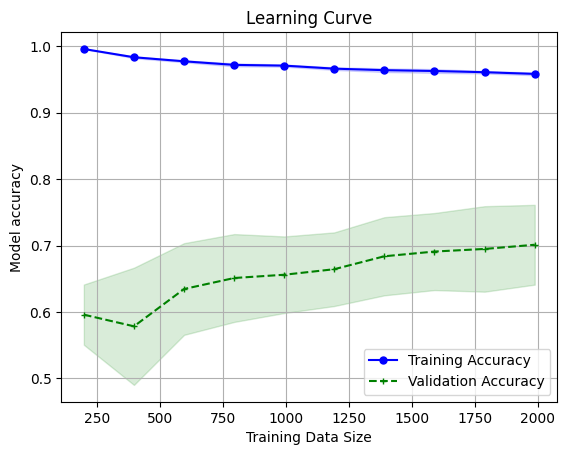

In [19]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
# #
# # Calculate training and test mean and std
# #
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# #
# # Plot the learning curve
# #
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.savefig('learning_curve.png')
plt.show()

In [ ]:
df_test = pd.DataFrame({
    'distributeur': ['Walt Disney Pictures'],
    'country': ['Etats-Unis'],
    'genre': ['Fantasy'],
    'public': ['Tous publics'],
    'durée': [122],
    'directeur': ['Justin Simien'],
    'acteur1': ['Lakeith Stanfield'],
    'acteur2': ['Tiffany Haddish'],
    'acteur3': ['Owen Wilson'],
    
    'numero_semaine': [30],

})

director_dict_lower = {director.lower(): value for director, value in director_dict.items()}
actor_dict_lower = {actor.lower(): value for actor, value in actor_dict.items()}

# Appliquer le mappage tout en convertissant les noms dans les données en minuscules
df_test['directeur'] = df_test['directeur'].str.lower().map(director_dict_lower).fillna(36701)
df_test['acteur1'] = df_test['acteur1'].str.lower().map(actor_dict_lower).fillna(32435)
df_test['acteur2'] = df_test['acteur2'].str.lower().map(actor_dict_lower).fillna(32435)
df_test['acteur3'] = df_test['acteur3'].str.lower().map(actor_dict_lower).fillna(32435)
# Utilisez la méthode 'predict' pour effectuer des prédictions
# predictions = pipe.predict(df_test)

# print("Prédictions:", predictions)
new_data_transformed = preprocessor.transform(df_test)

# 2. Utilisation du modèle pour faire des prédictions
predictions = log_reg.predict(new_data_transformed)

print("Prédictions:", predictions)

In [ ]:
df_test = pd.DataFrame({
    'distributeur': ['Pyramide'],
    'country': ['France'],
    'genre': ['Comédie'],
    'public': ['Tous publics'],
    'durée': [91],
    'directeur': ['Marie Garel-Weiss'],
    'acteur1': ['Daphne Patakia'],
    'acteur2': ['Benoît Poelvoord'],
    'acteur3': ['Agnès Jaoui'],
    
    'numero_semaine': [40],

})

director_dict_lower = {director.lower(): value for director, value in director_dict.items()}
actor_dict_lower = {actor.lower(): value for actor, value in actor_dict.items()}

# Appliquer le mappage tout en convertissant les noms dans les données en minuscules
df_test['directeur'] = df_test['directeur'].str.lower().map(director_dict_lower).fillna(36701)
df_test['acteur1'] = df_test['acteur1'].str.lower().map(actor_dict_lower).fillna(32435)
df_test['acteur2'] = df_test['acteur2'].str.lower().map(actor_dict_lower).fillna(32435)

# Utilisez la méthode 'predict' pour effectuer des prédictions
# predictions = pipe.predict(df_test)

# print("Prédictions:", predictions)
new_data_transformed = preprocessor.transform(df_test)

# 2. Utilisation du modèle pour faire des prédictions
predictions = log_reg.predict(new_data_transformed)

print("Prédictions:", predictions)